In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from os import system

In [2]:
df=pd.read_csv("interview.csv")

In [3]:
df.head()

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes


In [4]:
pre_x=df[['CGPA','INTERACTIVE','PRACTICAL KNOWLEDGE','SKILLS']]
y=df[['JOB OFFEER']]

In [5]:
labelEncoder = LabelEncoder()

for col in pre_x.columns:
    df[col]=labelEncoder.fit_transform(df[col])

In [6]:
x=df[['CGPA','INTERACTIVE','PRACTICAL KNOWLEDGE','SKILLS']]

In [7]:
classes=y['JOB OFFEER'].unique()

In [8]:
classes

array(['Yes', 'No'], dtype=object)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf=clf.fit(x_train,y_train)

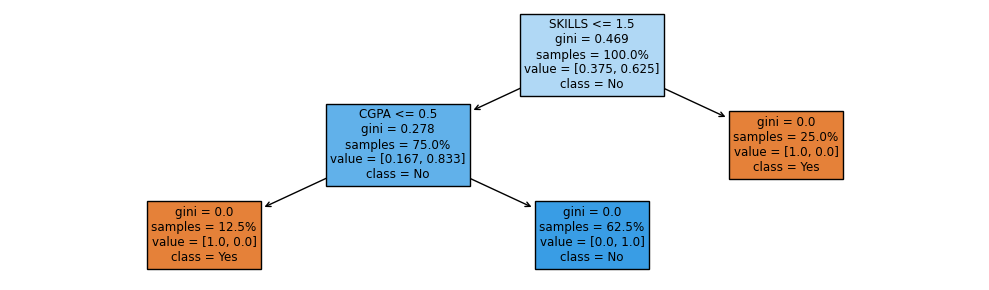

In [11]:
fig = plt.figure(figsize=(10,3))
tree.plot_tree(clf, 
                   feature_names=x.columns.to_list(),  
                   class_names=['Yes', 'No'],
                   filled=True,
                    proportion=True)
plt.tight_layout()

In [12]:
y_pred=clf.predict(x_test)

In [13]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 1.0


In [14]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2]]


In [15]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [16]:
with open("interview.txt","w") as f:
    f=tree.export_graphviz(clf,out_file=f)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/Users/amitanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

[Text(0.6, 0.875, 'x[2] <= 1.5\ngini = 0.469\nsamples = 4\nvalue = [3, 5]'),
 Text(0.4, 0.625, 'x[3] <= 0.5\ngini = 0.375\nsamples = 3\nvalue = [3, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.6, 0.375, 'x[0] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 4]')]

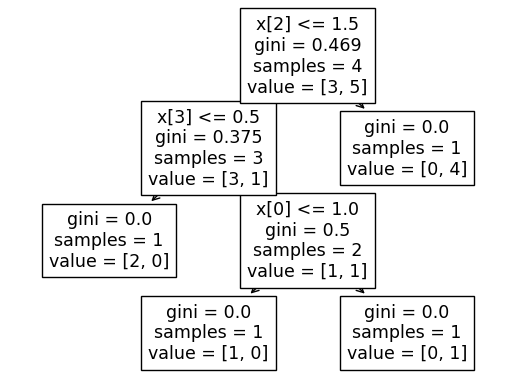

In [19]:
tree.plot_tree(rf.estimators_[0])

In [20]:
y_pred=rf.predict(x_test)

In [21]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 1.0


In [22]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2]]


In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [24]:
with open("jobOfferRF.txt","w") as f:
    f=tree.export_graphviz(rf.estimators_[0],out_file=f)